In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time
import os

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install mediapipe
!pip install pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 28.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read images from dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change dataset path here
#if you have already unzipped the dataset then skip this cell and change path in next cell
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recognition/

In [ ]:
import glob

images_train = glob.glob("/content/Human Action Recognition/train/*.jpg")

In [ ]:
import pandas as pd
image_label_map = pd.read_csv("/content/Human Action Recognition/Training_set.csv",index_col=0)

print(image_label_map)

                              label
filename                           
Image_1.jpg                 sitting
Image_2.jpg            using_laptop
Image_3.jpg                 hugging
Image_4.jpg                sleeping
Image_5.jpg            using_laptop
...                             ...
Image_12596.jpg             sitting
Image_12597.jpg            clapping
Image_12598.jpg             sitting
Image_12599.jpg             dancing
Image_12600.jpg  listening_to_music

[12600 rows x 1 columns]


In [ ]:
import mediapipe as mp
# Initialize the MediaPipe Pose model
mp_pose = mp.solutions.pose.Pose(
    static_image_mode = True,
    min_detection_confidence=0.7
)

In [ ]:
import random

def augment_image(image, count = 3):
  images = [image]
  for i in range(count):
    angle = random.choice([cv2.ROTATE_180,cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE])
    size = random.randint(200, 400)
    flip = random.randint(0,1)
    image = cv2.rotate(image, angle)
    image = cv2.resize(image, (size, size))
    if flip:
      image = cv2.flip(image, 1)  #horizontal flip

    images.append(image)

  return images

In [ ]:
def draw_landmarks(image):
  mp.solutions.drawing_utils.draw_landmarks(
              image,
              results.pose_landmarks,
              mp.solutions.pose.POSE_CONNECTIONS)
  return image

In [ ]:
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow

# Initialize a list to store the pose landmarks for each image
X = []
Y = []

# Loop through each image and detect the pose landmarks using MediaPipe
start_time = time.time()
for image_file in tqdm(images_train):
  filename = image_file.split("/")[-1]
  if filename not in image_label_map.index:
    continue

  # Load the image
  image = cv2.imread(image_file)

  # Convert the image from BGR to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  for augmented_image in augment_image(image, count=1):
    # Detect the pose landmarks
    results = mp_pose.process(augmented_image)

    # Extract the 3D coordinates of all 33 landmarks and store them in a list
    if results.pose_landmarks is not None:
      # augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
      # image_with_landmarks = draw_landmarks(augmented_image)
      # cv2_imshow(image_with_landmarks)
      landmarks_3d = []
      for landmark in results.pose_landmarks.landmark:
          landmarks_3d.extend([landmark.x, landmark.y, landmark.z])
      X.append(landmarks_3d)
      Y.append([image_label_map.loc[filename]['label']])
    else:
      continue      #skip this image if mediapipe can't detect landmarks

  if time.time() > start_time + 10:       #save extracted data every 30 seconds
    np.save("/content/drive/My Drive/X.npy",X)
    np.save("/content/drive/My Drive/Y.npy",Y)
    print('data saved')
    start_time = time.time()

# Convert the list of landmarks into a NumPy array
np.save("/content/drive/My Drive/X.npy",X)
np.save("/content/drive/My Drive/Y.npy",Y)

  1%|          | 68/12601 [00:10<30:29,  6.85it/s]

data saved


  1%|          | 140/12601 [00:20<36:35,  5.68it/s]

data saved


  2%|▏         | 216/12601 [00:30<27:16,  7.57it/s]

data saved


  2%|▏         | 272/12601 [00:40<45:00,  4.57it/s]

data saved


  3%|▎         | 336/12601 [00:50<31:31,  6.48it/s]

data saved


  3%|▎         | 397/12601 [01:00<30:58,  6.57it/s]

data saved


  4%|▍         | 473/12601 [01:10<36:33,  5.53it/s]

data saved


  4%|▍         | 542/12601 [01:20<29:25,  6.83it/s]

data saved


  5%|▍         | 609/12601 [01:30<42:39,  4.69it/s]

data saved


  5%|▌         | 677/12601 [01:40<25:46,  7.71it/s]

data saved


  6%|▌         | 732/12601 [01:50<31:36,  6.26it/s]

data saved


  6%|▋         | 808/12601 [02:00<22:54,  8.58it/s]

data saved


  7%|▋         | 869/12601 [02:11<26:42,  7.32it/s]

data saved


  7%|▋         | 944/12601 [02:21<40:48,  4.76it/s]

data saved


  8%|▊         | 1010/12601 [02:31<28:35,  6.76it/s]

data saved


  8%|▊         | 1070/12601 [02:41<41:54,  4.59it/s]

data saved


  9%|▉         | 1140/12601 [02:51<29:46,  6.42it/s]

data saved


 10%|▉         | 1200/12601 [03:01<35:46,  5.31it/s]

data saved


 10%|█         | 1283/12601 [03:11<23:33,  8.01it/s]

data saved


 11%|█         | 1349/12601 [03:22<23:18,  8.05it/s]

data saved


 11%|█▏        | 1419/12601 [03:32<39:39,  4.70it/s]

data saved


 12%|█▏        | 1487/12601 [03:42<26:50,  6.90it/s]

data saved


 12%|█▏        | 1551/12601 [03:52<32:21,  5.69it/s]

data saved


 13%|█▎        | 1626/12601 [04:02<25:23,  7.20it/s]

data saved


 13%|█▎        | 1689/12601 [04:12<27:49,  6.53it/s]

data saved


 14%|█▍        | 1770/12601 [04:22<29:51,  6.05it/s]

data saved


 15%|█▍        | 1834/12601 [04:32<27:54,  6.43it/s]

data saved


 15%|█▌        | 1905/12601 [04:42<27:51,  6.40it/s]

data saved


 16%|█▌        | 1976/12601 [04:53<23:53,  7.41it/s]

data saved


 16%|█▌        | 2041/12601 [05:03<38:20,  4.59it/s]

data saved


 17%|█▋        | 2113/12601 [05:13<25:36,  6.83it/s]

data saved


 17%|█▋        | 2176/12601 [05:23<23:43,  7.32it/s]

data saved


 18%|█▊        | 2256/12601 [05:33<33:02,  5.22it/s]

data saved


 18%|█▊        | 2322/12601 [05:43<23:35,  7.26it/s]

data saved


 19%|█▉        | 2394/12601 [05:53<37:18,  4.56it/s]

data saved


 20%|█▉        | 2467/12601 [06:04<23:17,  7.25it/s]

data saved


 20%|██        | 2530/12601 [06:13<29:13,  5.74it/s]

data saved


 21%|██        | 2606/12601 [06:24<23:55,  6.96it/s]

data saved


 21%|██        | 2667/12601 [06:34<22:11,  7.46it/s]

data saved


 22%|██▏       | 2741/12601 [06:44<31:38,  5.19it/s]

data saved


 22%|██▏       | 2806/12601 [06:54<21:07,  7.73it/s]

data saved


 23%|██▎       | 2879/12601 [07:04<36:27,  4.44it/s]

data saved


 23%|██▎       | 2951/12601 [07:14<23:56,  6.72it/s]

data saved


 24%|██▍       | 3015/12601 [07:24<25:37,  6.24it/s]

data saved


 25%|██▍       | 3093/12601 [07:34<21:18,  7.44it/s]

data saved


 25%|██▌       | 3156/12601 [07:44<21:34,  7.30it/s]

data saved


 26%|██▌       | 3221/12601 [07:55<36:25,  4.29it/s]

data saved


 26%|██▌       | 3257/12601 [08:05<31:04,  5.01it/s]

data saved


 26%|██▋       | 3334/12601 [08:15<22:11,  6.96it/s]

data saved


 27%|██▋       | 3395/12601 [08:25<23:22,  6.56it/s]

data saved


 27%|██▋       | 3465/12601 [08:35<35:45,  4.26it/s]

data saved


 28%|██▊       | 3538/12601 [08:46<19:45,  7.64it/s]

data saved


 29%|██▊       | 3608/12601 [08:56<27:48,  5.39it/s]

data saved


 29%|██▉       | 3683/12601 [09:06<22:17,  6.67it/s]

data saved


 30%|██▉       | 3740/12601 [09:16<23:43,  6.23it/s]

data saved


 30%|███       | 3815/12601 [09:26<29:02,  5.04it/s]

data saved


 31%|███       | 3882/12601 [09:36<20:14,  7.18it/s]

data saved


 31%|███▏      | 3953/12601 [09:47<26:01,  5.54it/s]

data saved


 32%|███▏      | 4024/12601 [09:57<21:02,  6.79it/s]

data saved


 32%|███▏      | 4086/12601 [10:07<31:56,  4.44it/s]

data saved


 33%|███▎      | 4166/12601 [10:17<18:36,  7.55it/s]

data saved


 34%|███▎      | 4230/12601 [10:27<17:25,  8.01it/s]

data saved


 34%|███▍      | 4310/12601 [10:37<27:32,  5.02it/s]

data saved


 35%|███▍      | 4376/12601 [10:47<17:36,  7.79it/s]

data saved


 35%|███▌      | 4447/12601 [10:57<25:41,  5.29it/s]

data saved


 36%|███▌      | 4514/12601 [11:07<22:00,  6.13it/s]

data saved


 36%|███▋      | 4577/12601 [11:18<27:40,  4.83it/s]

data saved


 37%|███▋      | 4649/12601 [11:28<17:25,  7.61it/s]

data saved


 37%|███▋      | 4713/12601 [11:38<18:12,  7.22it/s]

data saved


 38%|███▊      | 4791/12601 [11:48<26:38,  4.89it/s]

data saved


 39%|███▊      | 4860/12601 [11:58<18:41,  6.90it/s]

data saved


 39%|███▉      | 4925/12601 [12:09<32:00,  4.00it/s]

data saved


 40%|███▉      | 4993/12601 [12:19<18:25,  6.88it/s]

data saved


 40%|████      | 5052/12601 [12:29<19:38,  6.41it/s]

data saved


 41%|████      | 5129/12601 [12:39<14:16,  8.73it/s]

data saved


 41%|████      | 5193/12601 [12:49<18:15,  6.76it/s]

data saved


 42%|████▏     | 5269/12601 [12:59<27:58,  4.37it/s]

data saved


 42%|████▏     | 5337/12601 [13:10<16:01,  7.55it/s]

data saved


 43%|████▎     | 5399/12601 [13:20<26:57,  4.45it/s]

data saved


 43%|████▎     | 5473/12601 [13:30<16:24,  7.24it/s]

data saved


 44%|████▍     | 5532/12601 [13:40<22:07,  5.32it/s]

data saved


 45%|████▍     | 5616/12601 [13:50<20:48,  5.60it/s]

data saved


 45%|████▌     | 5678/12601 [14:00<16:46,  6.88it/s]

data saved


 46%|████▌     | 5747/12601 [14:11<26:10,  4.37it/s]

data saved


 46%|████▌     | 5824/12601 [14:21<13:44,  8.22it/s]

data saved


 47%|████▋     | 5889/12601 [14:31<20:35,  5.43it/s]

data saved


 47%|████▋     | 5965/12601 [14:41<18:09,  6.09it/s]

data saved


 48%|████▊     | 6030/12601 [14:51<17:22,  6.31it/s]

data saved


 48%|████▊     | 6101/12601 [15:01<27:14,  3.98it/s]

data saved


 49%|████▉     | 6165/12601 [15:12<12:40,  8.46it/s]

data saved


 49%|████▉     | 6235/12601 [15:22<20:22,  5.21it/s]

data saved


 50%|█████     | 6311/12601 [15:32<13:26,  7.80it/s]

data saved


 51%|█████     | 6376/12601 [15:42<17:39,  5.88it/s]

data saved


 51%|█████     | 6452/12601 [15:52<13:54,  7.37it/s]

data saved


 52%|█████▏    | 6513/12601 [16:03<15:55,  6.37it/s]

data saved


 52%|█████▏    | 6583/12601 [16:13<20:02,  5.00it/s]

data saved


 53%|█████▎    | 6650/12601 [16:23<15:02,  6.60it/s]

data saved


 53%|█████▎    | 6720/12601 [16:33<21:59,  4.46it/s]

data saved


 54%|█████▍    | 6790/12601 [16:43<16:01,  6.05it/s]

data saved


 54%|█████▍    | 6853/12601 [16:54<19:28,  4.92it/s]

data saved


 55%|█████▌    | 6932/12601 [17:04<13:26,  7.03it/s]

data saved


 56%|█████▌    | 7001/12601 [17:14<11:48,  7.90it/s]

data saved


 56%|█████▌    | 7074/12601 [17:24<23:15,  3.96it/s]

data saved


 57%|█████▋    | 7143/12601 [17:34<13:34,  6.70it/s]

data saved


 57%|█████▋    | 7209/12601 [17:44<20:03,  4.48it/s]

data saved


 58%|█████▊    | 7284/12601 [17:55<11:58,  7.40it/s]

data saved


 58%|█████▊    | 7341/12601 [18:05<23:26,  3.74it/s]

data saved


 59%|█████▊    | 7392/12601 [18:15<13:16,  6.54it/s]

data saved


 59%|█████▉    | 7451/12601 [18:25<12:53,  6.65it/s]

data saved


 60%|█████▉    | 7530/12601 [18:36<17:29,  4.83it/s]

data saved


 60%|██████    | 7594/12601 [18:46<13:02,  6.40it/s]

data saved


 61%|██████    | 7662/12601 [18:56<16:32,  4.97it/s]

data saved


 61%|██████▏   | 7735/12601 [19:06<12:33,  6.46it/s]

data saved


 62%|██████▏   | 7769/12601 [19:17<30:26,  2.65it/s]

data saved


 62%|██████▏   | 7811/12601 [19:27<40:22,  1.98it/s]

data saved


 62%|██████▏   | 7866/12601 [19:38<13:18,  5.93it/s]

data saved


 63%|██████▎   | 7939/12601 [19:48<17:03,  4.55it/s]

data saved


 64%|██████▎   | 8006/12601 [19:58<11:03,  6.93it/s]

data saved


 64%|██████▍   | 8072/12601 [20:08<14:17,  5.28it/s]

data saved


 65%|██████▍   | 8147/12601 [20:19<10:25,  7.12it/s]

data saved


 65%|██████▌   | 8208/12601 [20:29<10:55,  6.70it/s]

data saved


 66%|██████▌   | 8280/12601 [20:39<13:01,  5.53it/s]

data saved


 66%|██████▌   | 8345/12601 [20:49<11:36,  6.11it/s]

data saved


 67%|██████▋   | 8416/12601 [20:59<12:41,  5.50it/s]

data saved


 67%|██████▋   | 8481/12601 [21:10<09:07,  7.53it/s]

data saved


 68%|██████▊   | 8551/12601 [21:20<11:05,  6.08it/s]

data saved


 68%|██████▊   | 8624/12601 [21:30<10:53,  6.09it/s]

data saved


 69%|██████▉   | 8690/12601 [21:40<09:34,  6.81it/s]

data saved


 70%|██████▉   | 8761/12601 [21:50<13:30,  4.74it/s]

data saved


 70%|███████   | 8825/12601 [22:00<09:19,  6.75it/s]

data saved


 71%|███████   | 8894/12601 [22:10<13:45,  4.49it/s]

data saved


 71%|███████   | 8960/12601 [22:21<08:27,  7.18it/s]

data saved


 72%|███████▏  | 9019/12601 [22:31<15:40,  3.81it/s]

data saved


 72%|███████▏  | 9102/12601 [22:41<08:30,  6.85it/s]

data saved


 73%|███████▎  | 9165/12601 [22:51<08:12,  6.97it/s]

data saved


 73%|███████▎  | 9238/12601 [23:02<12:24,  4.52it/s]

data saved


 74%|███████▍  | 9302/12601 [23:12<08:03,  6.82it/s]

data saved


 74%|███████▍  | 9367/12601 [23:22<11:33,  4.66it/s]

data saved


 75%|███████▍  | 9441/12601 [23:32<08:18,  6.34it/s]

data saved


 75%|███████▌  | 9498/12601 [23:43<08:21,  6.19it/s]

data saved


 76%|███████▌  | 9570/12601 [23:53<08:31,  5.93it/s]

data saved


 76%|███████▋  | 9634/12601 [24:03<08:14,  6.00it/s]

data saved


 77%|███████▋  | 9712/12601 [24:13<09:14,  5.21it/s]

data saved


 78%|███████▊  | 9774/12601 [24:23<07:58,  5.91it/s]

data saved


 78%|███████▊  | 9842/12601 [24:33<10:03,  4.57it/s]

data saved


 79%|███████▊  | 9916/12601 [24:44<07:04,  6.33it/s]

data saved


 79%|███████▉  | 9981/12601 [24:54<07:29,  5.83it/s]

data saved


 80%|███████▉  | 10056/12601 [25:04<07:37,  5.57it/s]

data saved


 80%|████████  | 10116/12601 [25:14<06:36,  6.27it/s]

data saved


 81%|████████  | 10189/12601 [25:25<09:15,  4.34it/s]

data saved


 81%|████████▏ | 10258/12601 [25:35<06:25,  6.08it/s]

data saved


 82%|████████▏ | 10323/12601 [25:45<08:34,  4.43it/s]

data saved


 83%|████████▎ | 10400/12601 [25:55<04:56,  7.42it/s]

data saved


 83%|████████▎ | 10459/12601 [26:05<04:58,  7.17it/s]

data saved


 84%|████████▎ | 10538/12601 [26:16<06:26,  5.33it/s]

data saved


 84%|████████▍ | 10604/12601 [26:26<04:52,  6.82it/s]

data saved


 85%|████████▍ | 10669/12601 [26:36<07:28,  4.31it/s]

data saved


 85%|████████▌ | 10743/12601 [26:46<05:37,  5.50it/s]

data saved


 86%|████████▌ | 10807/12601 [26:57<06:30,  4.60it/s]

data saved


 86%|████████▋ | 10884/12601 [27:07<05:02,  5.68it/s]

data saved


 87%|████████▋ | 10951/12601 [27:17<04:59,  5.52it/s]

data saved


 88%|████████▊ | 11026/12601 [27:28<06:29,  4.05it/s]

data saved


 88%|████████▊ | 11091/12601 [27:38<04:16,  5.88it/s]

data saved


 89%|████████▊ | 11156/12601 [27:48<05:13,  4.62it/s]

data saved


 89%|████████▉ | 11228/12601 [27:58<04:16,  5.35it/s]

data saved


 90%|████████▉ | 11289/12601 [28:09<03:16,  6.68it/s]

data saved


 90%|█████████ | 11361/12601 [28:19<05:15,  3.93it/s]

data saved


 90%|█████████ | 11398/12601 [28:30<05:15,  3.81it/s]

data saved


 91%|█████████ | 11478/12601 [28:39<01:52,  9.96it/s]

data saved


 92%|█████████▏| 11542/12601 [28:50<02:31,  7.00it/s]

data saved


 92%|█████████▏| 11614/12601 [29:00<04:20,  3.79it/s]

data saved


 93%|█████████▎| 11681/12601 [29:11<02:52,  5.32it/s]

data saved


 93%|█████████▎| 11747/12601 [29:21<03:42,  3.84it/s]

data saved


 94%|█████████▍| 11820/12601 [29:31<02:01,  6.44it/s]

data saved


 94%|█████████▍| 11880/12601 [29:42<01:54,  6.32it/s]

data saved


 95%|█████████▍| 11955/12601 [29:52<03:02,  3.55it/s]

data saved


 95%|█████████▌| 12022/12601 [30:02<01:31,  6.35it/s]

data saved


 96%|█████████▌| 12091/12601 [30:12<02:01,  4.18it/s]

data saved


 97%|█████████▋| 12165/12601 [30:23<01:07,  6.44it/s]

data saved


 97%|█████████▋| 12225/12601 [30:33<01:23,  4.49it/s]

data saved


 98%|█████████▊| 12298/12601 [30:43<00:55,  5.47it/s]

data saved


 98%|█████████▊| 12359/12601 [30:53<00:42,  5.73it/s]

data saved


 99%|█████████▊| 12428/12601 [31:04<00:37,  4.60it/s]

data saved


 99%|█████████▉| 12495/12601 [31:14<00:15,  7.03it/s]

data saved


100%|█████████▉| 12558/12601 [31:24<00:10,  4.01it/s]

data saved


100%|██████████| 12601/12601 [31:31<00:00,  6.66it/s]


In [ ]:
X = np.load("/content/drive/My Drive/X.npy",allow_pickle=True)
Y = np.load("/content/drive/My Drive/Y.npy",allow_pickle=True)
print(X.shape,Y.shape)

(14786, 99) (14786, 1)


In [ ]:
# label_map = {'calling': 'active',
#              'clapping': 'active',
#              'cycling': 'active',
#              'dancing': 'active',
#              'fighting': 'active',
#              'running': 'active',
#              'drinking': 'passive',
#              'eating': 'passive',
#              'hugging': 'passive',
#              'laughing': 'passive',
#              'listening_to_music': 'passive',
#              'sitting': 'passive',
#              'sleeping': 'passive',
#              'texting': 'passive',
#              'using_laptop': 'passive'}
label_map = {'calling': 1,
             'clapping': 1,
             'cycling': 1,
             'dancing': 1,
             'fighting': 1,
             'running': 1,
             'drinking': 0,
             'eating': 0,
             'hugging': 0,
             'laughing': 0,
             'listening_to_music': 0,
             'sitting': 0,
             'sleeping': 0,
             'texting': 0,
             'using_laptop': 0}
replace_func = np.vectorize(lambda x: label_map.get(x, x))

Y[:, 0] = replace_func(Y[:, 0])
Y = Y.astype('float32')
print(Y[:10])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(11828, 99) (11828, 1) (2958, 99) (2958, 1)


In [ ]:
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Dense
from keras.metrics import FalsePositives, FalseNegatives, Precision, Recall

start = time.time()

#Train Tensorflow
model = Sequential()
model.add( Dense(60, activation='relu', input_dim=X.shape[1]))
model.add( Dense(40, activation='relu'))
model.add( Dense(20, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', Precision(),Recall()])


# Train the model
model.fit(
    X_train, 
    Y_train, 
    epochs=100, 
    validation_data=(X_test,Y_test),
    shuffle=True,
    callbacks=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'))

model.save(f"/content/drive/MyDrive/model.h5")

print(f"training time={time.time()-start}")

Epoch 1/100
370/370 [==============================] - 3s 4ms/step - loss: 0.5928 - binary_accuracy: 0.6895 - precision_2: 0.6780 - recall_2: 0.4368 - val_loss: 0.5628 - val_binary_accuracy: 0.7228 - val_precision_2: 0.7822 - val_recall_2: 0.4597
Epoch 2/100
370/370 [==============================] - 1s 3ms/step - loss: 0.5359 - binary_accuracy: 0.7469 - precision_2: 0.7335 - recall_2: 0.5839 - val_loss: 0.5320 - val_binary_accuracy: 0.7563 - val_precision_2: 0.7756 - val_recall_2: 0.5803
Epoch 3/100
370/370 [==============================] - 2s 5ms/step - loss: 0.5122 - binary_accuracy: 0.7637 - precision_2: 0.7563 - recall_2: 0.6102 - val_loss: 0.5173 - val_binary_accuracy: 0.7569 - val_precision_2: 0.7193 - val_recall_2: 0.6789
Epoch 4/100
370/370 [==============================] - 2s 5ms/step - loss: 0.5035 - binary_accuracy: 0.7680 - precision_2: 0.7612 - recall_2: 0.6181 - val_loss: 0.5009 - val_binary_accuracy: 0.7688 - val_precision_2: 0.7564 - val_recall_2: 0.6528
Epoch 5/100


93/93 [==============================] - 0s 2ms/step
[[1514  217]
 [ 403  824]]


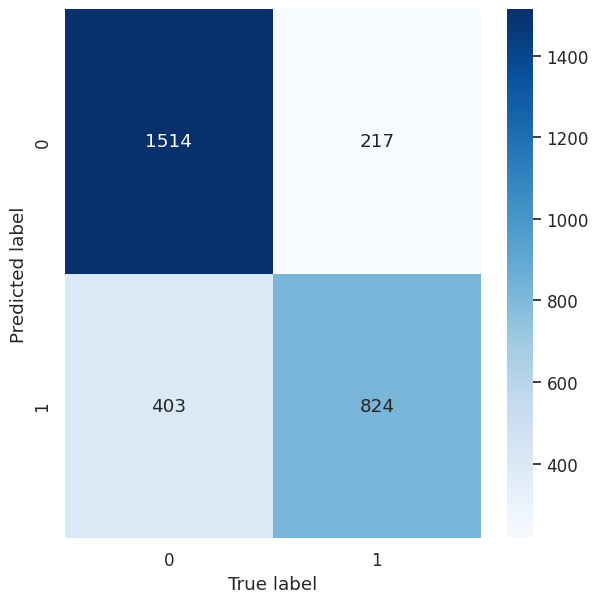

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Print accuracy, confusion matrix, etc.
def show_confusion_matrix(model,X_test,Y_test):
    Y_pred = [y.round() for y in model.predict(X_test)]
    Y_true = [y for y in Y_test]
    con_mat = confusion_matrix(Y_true, Y_pred)
    print(con_mat)
    figure = plt.figure(figsize=(6, 6))
    sns.set(font_scale=1.1)
    sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt='d')
    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    # plt.xticks(np.arange(len(classes)), classes)
    # plt.yticks(np.arange(len(classes)), classes)
    plt.show()

show_confusion_matrix(model,X_test,Y_test)

In [ ]:

import cv2
import mediapipe as mp
import keras

# Initialize the MediaPipe Pose model
mp_pose = mp.solutions.pose.Pose(
    static_image_mode = True,
    min_detection_confidence=0.7
)

model = keras.models.load_model("model.h5")


def predict(features):
    model = keras.models.load_model("model.h5")

    # Make predictions on new data
    return model.predict([features])[0]

# create OpenCV video capture object
cap = cv2.VideoCapture('exercise_video_short.mp4')

def draw_landmarks(image):
  mp.solutions.drawing_utils.draw_landmarks(
              image,
              results.pose_landmarks,
              mp.solutions.pose.POSE_CONNECTIONS)
  return image

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 25.0
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(f'output.mp4', fourcc, fps, (width, height))

video_size = 0
while video_size<25*20:              #record 10s @ 25fps
    ret, image = cap.read()
    if ret:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = mp_pose.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract the 3D coordinates of all 33 landmarks and store them in a list
        if results.pose_landmarks is not None:
            image = draw_landmarks(image)
            landmarks_3d = []
            for landmark in results.pose_landmarks.landmark:
                landmarks_3d.extend([landmark.x, landmark.y, landmark.z])

            state = predict(landmarks_3d)
            frame = cv2.putText(image, f'Class: {"active" if state>.5 else "passive"} ({state})', (25, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                                fontScale=2.0, color=(0, 255, 0), thickness=2)

            cv2.imshow('video', image)
            out.write(image)
            video_size += 1
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break

out.release()
cap.release()
cv2.destroyAllWindows()